In [1]:
#======================================================================
#
#     This routine solves an infinite horizon growth model 
#     with dynamic programming and sparse grids
#
#     The model is described in Scheidegger & Bilionis (2017)
#     https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2927400
#
#     external libraries needed:
#     - IPOPT (https://projects.coin-or.org/Ipopt)
#     - PYIPOPT (https://github.com/xuy/pyipopt)
#     - TASMANIAN (http://tasmanian.ornl.gov/)
#
#     Simon Scheidegger, 11/16 ; 07/17
#======================================================================
# Note: Parameters are set in parameters.py
# interpolation.py does the VFI
import nonlinear_solver_initial as solver     #solves opt. problems for terminal VF
import nonlinear_solver_iterate as solviter   #solves opt. problems during VFI
from parameters4 import *                      #parameters of model
import interpolation as interpol              #interface to sparse grid library/terminal VF
import interpolation_iter as interpol_iter    #interface to sparse grid library/iteration
import postprocessing as post                 #computes the L2 and Linfinity error of the model
from matplotlib import pyplot as plt
import TasmanianSG                            #sparse grid library
import numpy as np

print(n_agents)
#======================================================================
# Start with Value Function Iteration
# This is only the initialization
# terminal value function
valnew=TasmanianSG.TasmanianSparseGrid() 
if (numstart==0):
    valnew=interpol.sparse_grid(n_agents, iDepth)
    valnew.write("valnew_1." + str(numstart) + ".txt") #write file to disk for restart

# value function during iteration
else:
    valnew.read("valnew_1." + str(numstart) + ".txt")  #write file to disk for restart
    
valold=TasmanianSG.TasmanianSparseGrid()
valold=valnew

1


In [2]:
#This is the iteration where old value function values are read in and updated
values=np.empty([33,1])
gridpts=np.empty([33,1])
for i in range(numstart, numits):
    valnew=TasmanianSG.TasmanianSparseGrid()
    valnew, values, gridpts=interpol_iter.sparse_grid_iter(n_agents, iDepth, valold)
    valold=TasmanianSG.TasmanianSparseGrid()
    valold=valnew
    valnew.write("valnew_1." + str(i+1) + ".txt")
    #valnew.plotPoints2D()
    #valnew.plotResponse2D
#======================================================================

#======================================================================
print( "===============================================================")
print( " " )
print( " Computation of a growth model of dimension ", n_agents ," finished after ", numits, " steps")
print( " " )
print( "===============================================================")
#======================================================================

# compute errors   
avg_err=post.ls_error(n_agents, numstart, numits, No_samples)

#======================================================================
print( "===============================================================")
print( " ")
print( " Errors are computed -- see errors.txt")
print( " ")
print( "===============================================================")


[[1.6   ]
 [0.2   ]
 [3.    ]
 [0.9   ]
 [2.3   ]
 [0.55  ]
 [1.25  ]
 [1.95  ]
 [2.65  ]
 [0.375 ]
 [0.725 ]
 [1.075 ]
 [1.425 ]
 [1.775 ]
 [2.125 ]
 [2.475 ]
 [2.825 ]
 [0.2875]
 [0.4625]
 [0.6375]
 [0.8125]
 [0.9875]
 [1.1625]
 [1.3375]
 [1.5125]
 [1.6875]
 [1.8625]
 [2.0375]
 [2.2125]
 [2.3875]
 [2.5625]
 [2.7375]
 [2.9125]]
[[-67.83597648]
 [-71.30307373]
 [-67.12582034]
 [-68.62057719]
 [-67.40863376]
 [-69.39517776]
 [-68.15627353]
 [-67.5968812 ]
 [-67.25486317]
 [-70.06465113]
 [-68.948742  ]
 [-68.36452104]
 [-67.98314147]
 [-67.70864158]
 [-67.49763464]
 [-67.32815555]
 [-67.18770056]
 [-70.56719602]
 [-69.69061793]
 [-69.15280716]
 [-68.77348064]
 [-68.48547374]
 [-68.25529652]
 [-68.06597628]
 [-67.90675163]
 [-67.77013046]
 [-67.65102818]
 [-67.54585057]
 [-67.45197177]
 [-67.36742049]
 [-67.29068274]
 [-67.22057282]
 [-67.15614646]]
[[1.6   ]
 [0.2   ]
 [3.    ]
 [0.9   ]
 [2.3   ]
 [0.55  ]
 [1.25  ]
 [1.95  ]
 [2.65  ]
 [0.375 ]
 [0.725 ]
 [1.075 ]
 [1.425 ]
 [1.775 ]


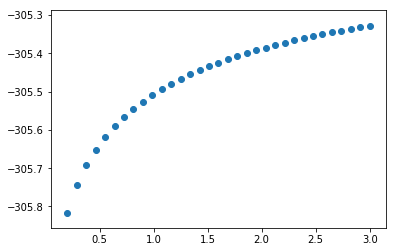

In [3]:
plt.figure()
plt.scatter(gridpts,values)
plt.show()

In [7]:
print(values.shape)

(33, 1)
